X1: [[ 1.  5.]
 [ 1. 15.]
 [ 1. 25.]
 [ 1. 35.]
 [ 1. 45.]
 [ 1. 55.]]
Модель 1 (с перехватом):
Коэффициенты модели: 
[5.63333333 0.54      ]
AIC модели: 42.14213247540879

Модель 2 (без перехвата):
Коэффициенты модели: 
[0.68181818]
AIC модели: 41.38470793321455


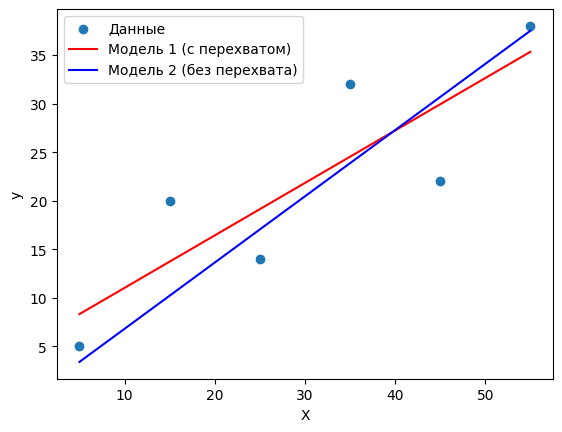

In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))  # x - это независимая переменная
y = np.array([5, 20, 14, 32, 22, 38])  # y - зависимая переменная

# Добавляем константу (перехват) для первой модели
X1 = sm.add_constant(x) #столбец из единиц, который потом подгонится под свободный член β
print("X1:", X1)

# Оценка модели с перехватом
model1 = sm.OLS(y, X1)  # создать объект — модель с OLS - методом наименьших квадратов
results1 = model1.fit()  # Подгонка модели

# Оценка второй модели без перехвата
model2 = sm.OLS(y, x)  # Модель без перехвата
results2 = model2.fit()

# Сравниваем AIC и параметры моделей
print("Модель 1 (с перехватом):")
print(f"Коэффициенты модели: \n{results1.params}")
print(f"AIC модели: {results1.aic}")

print("\nМодель 2 (без перехвата):")
print(f"Коэффициенты модели: \n{results2.params}")
print(f"AIC модели: {results2.aic}")

plt.scatter(x, y, label="Данные")
plt.plot(x, results1.fittedvalues, color='red', label="Модель 1 (с перехватом)")
plt.plot(x, results2.fittedvalues, color='blue', label="Модель 2 (без перехвата)")

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [1]:
import numpy as np

# Оценки пользователей по товарам
ratings = np.array([[1, 2, 5],
                    [3, 3, 6],
                    [3, 2, 4],
                    [4, 2, 3]])

# Дисперсии оценок для каждого товара (столбца)
item_variances = np.var(ratings, axis=0, ddof=1)

# Общая дисперсия для всех данных
total_variance = np.var(ratings, axis=None, ddof=1)

# Количество товаров
N = ratings.shape[1]

# Коэффициент Кронбаха альфа
cronbach_alpha = (N / (N - 1)) * (1 - np.sum(item_variances) / total_variance)

print(f"Коэффициент Кронбаха альфа: {cronbach_alpha}")

Коэффициент Кронбаха альфа: -1.1653846153846152


In [8]:
import numpy as np
from scipy.stats import spearmanr, kendalltau


# Данные рейтингов пользователей для 3 товаров
ratings = np.array([[1, 2, 5],
                    [3, 3, 6],
                    [3, 2, 4],
                    [4, 2, 3]])


# Расчёт корреляции Спирмена
spearman_corr, _ = spearmanr(ratings, axis=0)
print("Коэффициенты корреляции Спирмена по столбцам:")
print(spearman_corr)

# Расчёт корреляции Кендалла (по парам)
kendall_corr1, p_value = kendalltau(ratings[:, 0], ratings[:, 1])
print(f"\nКорреляция Кендалла между первым и вторым столбцом: {kendall_corr1, p_value}")
kendall_corr2, p_value = kendalltau(ratings[:, 1], ratings[:, 2])
print(f"\nКорреляция Кендалла между вторым и третьим столбцом: {kendall_corr2, p_value}")
kendall_corr3, p_value = kendalltau(ratings[:, 0], ratings[:, 2])
print(f"\nКорреляция Кендалла между первым и третьим столбцом: {kendall_corr3, p_value}")
print(f"\nКорреляция Кендалла средняя: {np.mean([kendall_corr1,kendall_corr2,kendall_corr3])}")


# Расчёт коэффициента Кендалла B
from statsmodels.stats.contingency_tables import mcnemar

# Расчет для каждого товара
# Сначала мы берем среднее значение для каждого товара
mean_ratings = np.mean(ratings, axis=0)

# Теперь считаем отклонения от среднего для каждого пользователя по каждому товару
deviations = ratings - mean_ratings

# Считаем сумму квадратов отклонений (S)
S = np.sum(deviations**2)

# Общая дисперсия (T) - это сумма квадратов всех отклонений от среднего значения по всем данным
T = np.sum((ratings - np.mean(ratings))**2)

# Коэффициент Рейча (R)
R = 1 - S / T

print("Коэффициент Рейча:", R)

Коэффициенты корреляции Спирмена по столбцам:
[[ 1.          0.         -0.63245553]
 [ 0.          1.          0.77459667]
 [-0.63245553  0.77459667  1.        ]]

Корреляция Кендалла между первым и вторым столбцом: (0.0, 1.0)

Корреляция Кендалла между вторым и третьим столбцом: (0.7071067811865477, 0.17971249487899976)

Корреляция Кендалла между первым и третьим столбцом: (-0.5477225575051662, 0.2785986718379625)

Корреляция Кендалла средняя: 0.0531280745604605
Коэффициент Рейча: 0.5153846153846153


In [3]:
import os
current_directory = os.getcwd()
print("Вы находитесь в папке:", current_directory)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Зареждане на CSV файла
file_path = 'laptop_price - dataset.csv'
df = pd.read_csv(file_path)
df.head(10)


Вы находитесь в папке: /Users/admin/Downloads


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00


In [12]:
print(pd.unique(df['Inches']))

df['Inches_rank']=df['Inches'].rank(method='dense')

[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


In [17]:
df['Price_rank']=df['Price (Euro)'].apply(lambda x: (x // 500) + 1).rank(method='dense', ascending=True)

In [18]:
print(pd.unique(df['Price_rank']))


[ 3.  2.  6.  4.  1.  5. 12.  7.  8. 10.  9. 11.]


In [21]:
from scipy.stats import spearmanr, kendalltau

kendall_corr1, p_value = kendalltau(df['Inches_rank'], df['Price_rank'])
print(f"\nКорреляция Кендалла: {kendall_corr1, p_value}")


Корреляция Кендалла: (-0.03884727856971686, 0.0923711681048132)


In [23]:
spearman_corr, p_value = spearmanr(df['Inches_rank'], df['Price_rank'])
print("Коэффициенты корреляции Спирмена, p:")
print(spearman_corr, p_value)

Коэффициенты корреляции Спирмена, p:
-0.04253670700072878 0.12899887531236923
